In [ ]:
#!pip install dtale

##Initing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# import dtale

In [ ]:
df = pd.read_csv('fods.csv')

In [ ]:
df.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
count,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,21.690419,40.220080,20.344861,40.377512,22.280352,39.198048,20.873386,38.975406,19.604398,50.885176,...,41.536461,7.428617,755.583426,79.555378,4.042746,38.323512,3.737419,24.987185,24.987185,98.187231
std,1.620154,3.993965,2.220000,4.110228,2.025712,3.277258,2.054464,4.379665,1.872623,9.107381,...,4.171167,5.346479,7.340250,14.987449,2.456597,11.809753,4.224038,14.355992,14.355992,104.336336
min,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,28.790000,15.335000,29.815000,...,29.166667,-5.000000,729.300000,25.000000,0.000000,1.000000,-6.520000,0.005322,0.005322,10.000000
25%,20.700000,37.230000,18.790000,37.760000,20.790000,36.790000,19.500000,35.400000,18.230000,45.257500,...,38.500000,3.600000,751.000000,70.000000,2.000000,29.000000,0.867000,12.613872,12.613872,50.000000
50%,21.600000,39.625000,20.000000,40.466667,22.100000,38.500000,20.700000,38.371667,19.390000,49.000000,...,40.900000,6.950000,756.133333,83.333333,3.666667,40.000000,3.400000,25.037891,25.037891,60.000000
75%,22.633333,43.090000,21.533333,43.260000,23.390000,41.700000,22.100000,42.200000,20.700000,53.626667,...,44.326667,10.400000,761.000000,91.625000,5.500000,40.000000,6.530000,37.385067,37.385067,100.000000
max,26.260000,57.423333,29.666667,54.090000,29.198571,50.163333,26.140000,50.930000,25.795000,96.321667,...,53.090000,26.000000,772.300000,100.000000,14.000000,66.000000,15.400000,49.996530,49.996530,880.000000


In [ ]:
df.shape

(7894, 27)

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [ ]:
np.unique(y)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 780, 790,
       800, 820, 840, 850, 870, 880])

In [ ]:
# x = StandardScaler().fit_transform(x)
x = (x - x.mean(axis=0)) / x.std(axis=0)
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

In [ ]:
scaler_x = StandardScaler()
scaler_x.fit(x)
x_scaled = scaler_x.transform(x)
x_scaled.shape

(7894, 26)

In [ ]:
y = np.array(y).reshape(-1,1)
y.shape
scaler_y = StandardScaler()
scaler_y.fit(y)
y_scaled = scaler_y.transform(y)
y_scaled.shape

(7894, 1)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y_scaled, test_size=0.2 ,random_state=30)

# normal linear regression

In [ ]:
class CustomLinearRegression:
  def __init__(self):
    self.lr = 1e-1
    self.epochs = 1000
    pass
  
  def fit(self, X, y):
    self.W = np.zeros((X.shape[1],1))
    self.b = np.array([0])
    for _ in range(self.epochs):
      y_hat = np.dot(X, self.W) + self.b
      m = X.shape[0]
      dy = (y_hat - y)
      dW = (1/m) * np.dot(X.T, dy)
      db = (1/m) * np.sum(dy)
      self.W = self.W - self.lr*dW
      self.b = self.b - self.lr*db
  
  def predict(self, X):
    return np.dot(X, self.W) + self.b

In [ ]:
model = CustomLinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_train)
rmse_train = math.sqrt(mean_squared_error(y_train,predict))
print(rmse_train)
predict = model.predict(x_test)
rmse_test = math.sqrt(mean_squared_error(y_test,predict))
print(rmse_test)

0.9188336272587068
0.9595421388199727


# pearson corelation coefficients

In [ ]:
corr = df.corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
T1,1.000000,0.178933,0.835130,0.011691,0.894352,-0.011956,0.877252,0.116273,0.886643,-0.010714,0.661023,-0.611235,0.839354,0.154633,0.826399,0.011895,0.845590,0.085180,0.689550,-0.152967,-0.336335,-0.085538,-0.070779,0.584141,-0.012107,-0.012107,0.047674
RH_1,0.178933,1.000000,0.276238,0.796138,0.263876,0.847546,0.118085,0.883630,0.212241,0.297274,0.322296,0.245392,0.028955,0.807553,-0.023747,0.743290,0.124271,0.768783,0.348501,-0.282372,0.277867,0.193350,-0.021770,0.649621,0.002357,0.002357,0.076796
T2,0.835130,0.276238,1.000000,-0.162602,0.736454,0.129662,0.761724,0.239872,0.720565,0.032289,0.807969,-0.580265,0.661834,0.240197,0.579572,0.080007,0.675321,0.163253,0.798574,-0.129055,-0.500455,0.050443,-0.064290,0.592350,-0.021814,-0.021814,0.109542
RH_2,0.011691,0.796138,-0.162602,1.000000,0.142959,0.681097,-0.035901,0.722959,0.113751,0.247188,-0.012088,0.392880,-0.044272,0.694042,-0.036467,0.683669,0.061364,0.677971,0.033714,-0.249710,0.590412,0.056591,-0.007080,0.501457,0.018697,0.018697,-0.066223
T3,0.894352,0.263876,0.736454,0.142959,1.000000,0.005587,0.851022,0.140187,0.886695,-0.056343,0.688809,-0.642801,0.845735,0.190543,0.795925,0.062567,0.898432,0.145216,0.702365,-0.194602,-0.275341,-0.097867,-0.101457,0.651865,-0.006625,-0.006625,0.080892
RH_3,-0.011956,0.847546,0.129662,0.681097,0.005587,1.000000,-0.127376,0.902176,-0.040529,0.363552,0.089741,0.509675,-0.240437,0.838316,-0.272890,0.832622,-0.182422,0.836901,0.130942,-0.222577,0.361853,0.243822,0.022930,0.433241,-0.000790,-0.000790,0.026723
T4,0.877252,0.118085,0.761724,-0.035901,0.851022,-0.127376,1.000000,-0.033982,0.871195,-0.073017,0.658710,-0.701927,0.877416,0.058625,0.799421,-0.078111,0.891198,-0.013416,0.670967,-0.085833,-0.382282,-0.177893,-0.099674,0.531309,-0.014884,-0.014884,0.035641
RH_4,0.116273,0.883630,0.239872,0.722959,0.140187,0.902176,-0.033982,1.000000,0.102104,0.344591,0.266124,0.388433,-0.120200,0.897474,-0.156562,0.849402,-0.032192,0.857799,0.300601,-0.238568,0.340567,0.283167,0.004262,0.626854,0.006165,0.006165,0.013502
T5,0.886643,0.212241,0.720565,0.113751,0.886695,-0.040529,0.871195,0.102104,1.000000,0.038402,0.631955,-0.631757,0.870028,0.159894,0.825336,0.026734,0.911267,0.078143,0.654523,-0.177142,-0.270591,-0.143658,-0.078530,0.592169,-0.007679,-0.007679,0.012428
RH_5,-0.010714,0.297274,0.032289,0.247188,-0.056343,0.363552,-0.073017,0.344591,0.038402,1.000000,-0.066200,0.251613,-0.139353,0.321483,-0.083088,0.349513,-0.130988,0.265481,-0.043434,-0.118136,0.184585,0.066977,-0.021157,0.088158,-0.020413,-0.020413,0.011210


Optimal features based on linear relations seem to be T2,T6,RH_out

In [ ]:
corr_score = abs(df.corr()['Appliances'])
corr_score = corr_score.sort_values(ascending=False)
corr_score
# type(corr_score)
# corr_score.name

Appliances     1.000000
RH_out         0.157888
T6             0.115799
T2             0.109542
T_out          0.098908
RH_8           0.091040
Windspeed      0.090048
RH_6           0.083081
T3             0.080892
RH_1           0.076796
RH_2           0.066223
RH_7           0.059254
RH_9           0.051292
T1             0.047674
T4             0.035641
T8             0.032599
Press_mm_hg    0.029705
RH_3           0.026723
T7             0.020004
RH_4           0.013502
T5             0.012428
RH_5           0.011210
Tdewpoint      0.009925
Visibility     0.004848
T9             0.004509
rv1            0.000058
rv2            0.000058
Name: Appliances, dtype: float64

In [ ]:
features = ['RH_out'  , 'T6' , 'T2' , 'T_out','RH_8','Windspeed','RH_6','T3','RH_1','RH_2','RH_7','RH_9','T1','T4','T8','Press_mm_hg','RH_3','T7','RH_4','T5','RH_5','Tdewpoint','Visibility','T9','rv1','rv2'] 
new_df = df.loc[:,features]

# new_df.shape


In [ ]:
class CustomLinearRegression:
  def __init__(self):
    self.lr = 1e-4
    self.epochs = 10000
    pass
  
  def fit(self, X, y):
    self.W = np.zeros((X.shape[1],1))
    self.b = np.array([0])
    for _ in range(self.epochs):
      y_hat = np.dot(X, self.W) + self.b
      m = X.shape[0]
      dy = (y_hat - y)
      dW = (1/m) * np.dot(X.T, dy)
      db = (1/m) * np.sum(dy)
      self.W = self.W - self.lr*dW
      self.b = self.b - self.lr*db
  
  def predict(self, X):
    return np.dot(X, self.W) + self.b

In [ ]:
training_errors = []
testing_errors = []
for i in range(1,27):
  x_new = new_df.iloc[: , 0:i]
  y_new = y_scaled
  x_train_new , x_test_new , y_train , y_test = train_test_split(x_new, y_new, test_size=0.2 ,random_state=30)
  model = LinearRegression()
  model.fit(x_train_new,y_train)
  pred_test = model.predict(x_test_new)
  rmse_test = math.sqrt(mean_squared_error(y_test,pred_test))
  testing_errors.append(rmse_test)
  # print(rmse)
  pred_train = model.predict(x_train_new)
  rmse_train = math.sqrt(mean_squared_error(y_train,pred_train))
  # print(rmse_train)
  training_errors.append(rmse_train)
# i = 2
# x_new = new_df.iloc[: , 0:i]
# y_new = y_scaled
# x_train_new , x_test_new , y_train , y_test = train_test_split(x_new, y_new, test_size=0.2 ,random_state=30)
# model = CustomLinearRegression()
# model.fit(x_train_new,y_train)
# pred = model.predict(x_test_new)
# rmse = math.sqrt(mean_squared_error(y_test,pred))
# print(rmse)

In [ ]:
training_errors

[0.9807573041298806,
 0.9804596643190593,
 0.9800637380730565,
 0.9774891080477224,
 0.9774488127269649,
 0.9740775871170549,
 0.9693417935385825,
 0.9618151881046705,
 0.9479896899020618,
 0.9322109840059927,
 0.9314220090124049,
 0.9310080320202557,
 0.9302751313121883,
 0.9297170141519552,
 0.9295644507098129,
 0.9290483139618343,
 0.9261443816812072,
 0.9236243881530117,
 0.9229587906837814,
 0.922390302210355,
 0.9212397990265961,
 0.9211853615347243,
 0.9210529163301318,
 0.9183102033508473,
 0.9182504020428002,
 0.9182504020428002]

In [ ]:
testing_errors

[1.0138305252232325,
 1.0126499729382012,
 1.0136520580996669,
 1.0097275685834053,
 1.0094897318630554,
 1.0054556230259837,
 1.0040860809676246,
 0.9983997341247439,
 0.9845504920481979,
 0.9693934496877064,
 0.9689709076949549,
 0.9685449789936404,
 0.9687553987622811,
 0.968227670323859,
 0.9681367051246411,
 0.9694632986662519,
 0.968189290443454,
 0.9654924025146251,
 0.9648935935744244,
 0.9639930518992393,
 0.9643613534563054,
 0.9645317456820726,
 0.9640611897324252,
 0.95947435603909,
 0.9595423601536056,
 0.9595423601536056]

Text(0.5, 1.0, 'Training error')

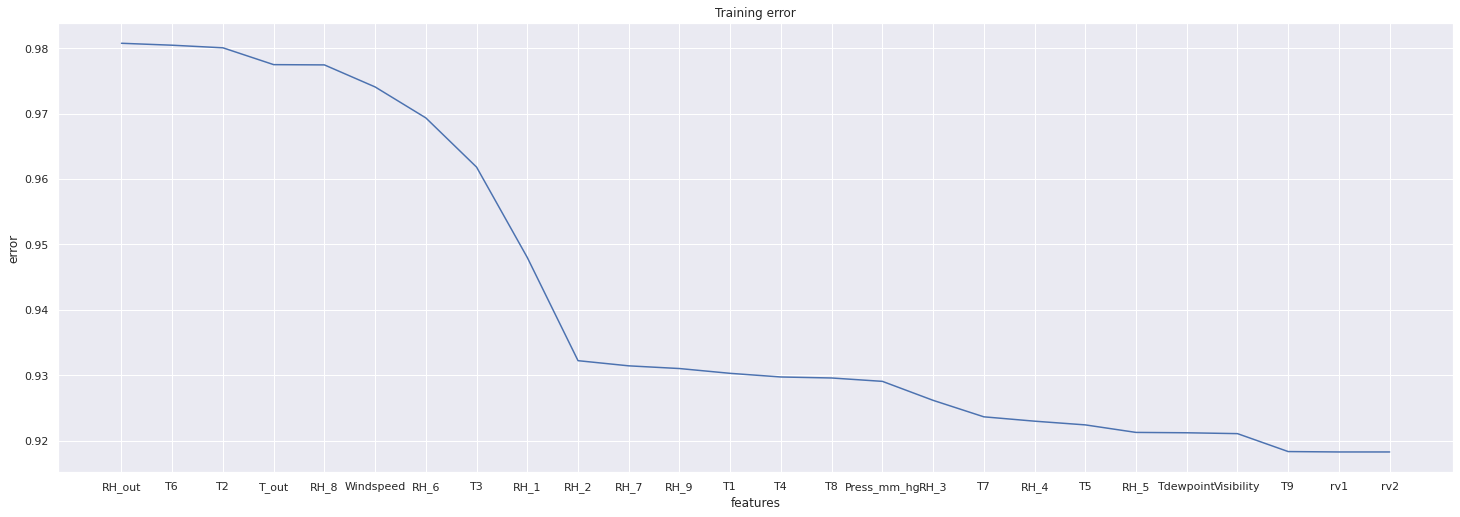

In [ ]:
sns.set(rc={'figure.figsize':(25,8.27)})
g = sns.lineplot(x=features, y=training_errors)
g.set_xlabel('features')
g.set_ylabel('error')
g.set_title('Training error')

Text(0.5, 1.0, 'Testing error')

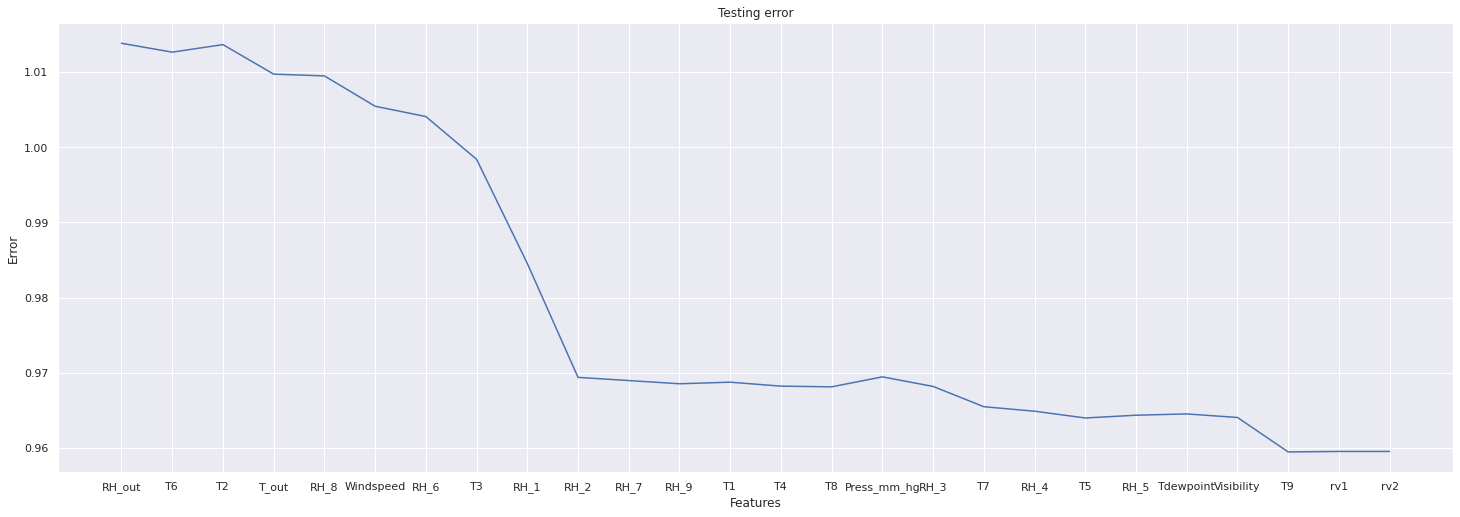

In [ ]:
sns.set(rc={'figure.figsize':(25,8.27)})
g = sns.lineplot(x=features, y=testing_errors)
g.set_xlabel('Features')
g.set_ylabel('Error')
g.set_title('Testing error')

In [ ]:
corr_score.shape

(27,)

# PCA

In [ ]:
from sklearn.decomposition import PCA
# pca = PCA(0.95)
pca = PCA(0.98)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
#convert to dataframe
component_names = [f"PC{i+1}" for i in range(x_train_pca.shape[1])]
#x_pca = pd.DataFrame(x_train_pca, columns=component_names)

#x_pca.head()
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)
#print(pca.feature_names_in_)

[0.37737159 0.26452351 0.07504271 0.06909478 0.04000792 0.0349498
 0.03377931 0.02121744 0.02008782 0.01388578 0.0097094  0.00670252
 0.00544354 0.00529032 0.00434849]
[9.93386847 6.96327393 1.97541216 1.81883969 1.05316194 0.92001283
 0.88920109 0.55852445 0.52878845 0.3655271  0.25558866 0.17643611
 0.14329481 0.1392615  0.11446902]
15


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=x.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
T1,0.297798,0.056288,0.014004,-0.101364,-0.000997,0.048971,0.103322,-0.143240,0.272105,0.070115,0.211330,0.140782,0.113737,0.074159,0.269408
RH_1,0.135272,-0.318355,-0.015085,0.022295,-0.018995,-0.014004,-0.037644,0.124472,-0.228824,0.440318,0.270038,-0.083361,-0.026698,0.027117,-0.335976
T2,0.275110,0.016321,-0.047698,0.179765,-0.084750,0.155086,0.171957,-0.384285,0.144935,0.063422,0.317597,0.006252,-0.128085,0.074584,-0.186544
RH_2,0.064648,-0.296920,0.057085,-0.253734,0.055026,-0.157199,-0.183682,0.448375,-0.205501,0.240860,-0.003260,-0.010120,0.092251,-0.047941,0.171888
T3,0.302937,0.031330,0.032337,-0.129921,0.011328,-0.038152,-0.036227,0.031155,0.100072,0.004821,0.043362,-0.185786,0.272815,0.625966,0.148853
RH_3,0.044841,-0.348149,-0.037563,0.055638,-0.042516,0.072725,0.064677,-0.138279,0.023690,0.365175,0.053250,0.032321,0.029436,-0.020202,-0.087462
T4,0.291820,0.098984,0.025007,-0.119720,-0.040684,0.044458,0.023054,-0.074616,0.106252,0.085322,0.031167,-0.453141,-0.096978,-0.361031,-0.290229
RH_4,0.091905,-0.352254,-0.019785,0.088847,-0.062402,0.043537,-0.012829,-0.035947,0.016908,0.071824,0.135947,0.236286,0.022424,-0.029061,0.229106
T5,0.298075,0.049158,0.042201,-0.177311,0.034583,0.041124,0.083218,0.069201,0.126567,0.045219,0.048865,-0.184745,0.054888,-0.065928,0.422282
RH_5,-0.002768,-0.143762,-0.040759,-0.104400,0.117983,0.627447,0.606158,0.335957,-0.149109,-0.178158,-0.056433,-0.033452,-0.082319,0.068115,-0.024960


In [ ]:
model = CustomLinearRegression()
model.fit(x_train_pca,y_train)
# model.score(x_test_pca,y_test.values.ravel())
predict = model.predict(x_train_pca)
rmse_train = math.sqrt(mean_squared_error(y_train,predict))
print(rmse_train)
predict = model.predict(x_test_pca)
rmse_test = math.sqrt(mean_squared_error(y_test,predict))
print(rmse_test)
#print(r2_score(y_test,predict))

0.9434179872560874
0.9906850284767014
